In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
wines=pd.read_csv('C:\ML_project_template\data\\train.csv')

In [137]:
wines.head(2)

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387


In [138]:
wines.describe()

,id,carat,depth,table,x,y,z,price
count,193573.000000,193573.000000,193573.000000,193573.000000,193573.000000,193573.000000,193573.000000,193573.000000
mean,96786.000000,0.790688,61.820574,57.227675,5.715312,5.720094,3.534246,3969.155414
std,55879.856166,0.462688,1.081704,1.918844,1.109422,1.102333,0.688922,4034.374138
min,0.000000,0.200000,52.100000,49.000000,0.000000,0.000000,0.000000,326.000000
25%,48393.000000,0.400000,61.300000,56.000000,4.700000,4.710000,2.900000,951.000000
50%,96786.000000,0.700000,61.900000,57.000000,5.700000,5.720000,3.530000,2401.000000
75%,145179.000000,1.030000,62.400000,58.000000,6.510000,6.510000,4.030000,5408.000000
max,193572.000000,3.500000,71.600000,79.000000,9.650000,10.010000,31.300000,18818.000000


In [139]:
wines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193573 entries, 0 to 193572
Data columns (total 11 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       193573 non-null  int64  
 1   carat    193573 non-null  float64
 2   cut      193573 non-null  object 
 3   color    193573 non-null  object 
 4   clarity  193573 non-null  object 
 5   depth    193573 non-null  float64
 6   table    193573 non-null  float64
 7   x        193573 non-null  float64
 8   y        193573 non-null  float64
 9   z        193573 non-null  float64
 10  price    193573 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 16.2+ MB


In [140]:
wines.shape

(193573, 11)

In [141]:
wines.isnull().sum()

id         0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [142]:
wines.drop_duplicates(inplace=True)

In [143]:
# cat_col=data.columns[data.dtypes=='object']
num_col=wines.columns[wines.dtypes!='object']

In [144]:
wines[num_col]

,id,carat,depth,table,x,y,z,price
0,0,1.52,62.2,58.0,7.27,7.33,4.55,13619
1,1,2.03,62.0,58.0,8.06,8.12,5.05,13387
2,2,0.70,61.2,57.0,5.69,5.73,3.50,2772
3,3,0.32,61.6,56.0,4.38,4.41,2.71,666
4,4,1.70,62.6,59.0,7.65,7.61,4.77,14453
...,...,...,...,...,...,...,...,...
193568,193568,0.31,61.1,56.0,4.35,4.39,2.67,1130
193569,193569,0.70,60.3,58.0,5.75,5.77,3.47,2874
193570,193570,0.73,63.1,57.0,5.72,5.75,3.62,3036
193571,193571,0.34,62.9,55.0,4.45,4.49,2.81,681


In [145]:
# for col in cat_col:
#     print(data[col].value_counts())
#     print(f'here is the total cateories count:{len(data[col].value_counts())}')
#     print('='*20)

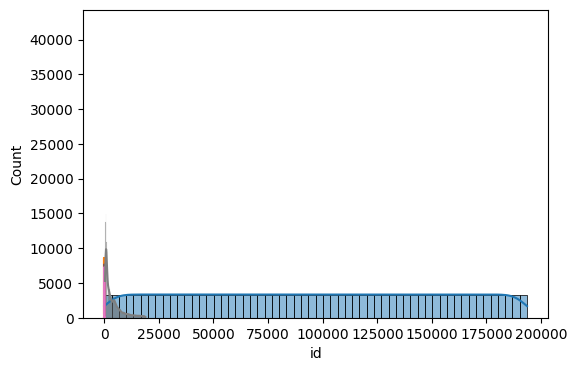

In [146]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(6,4))




for col in num_col:
    sns.histplot(wines,x=col,kde=True)
    print('\n')

<Axes: >

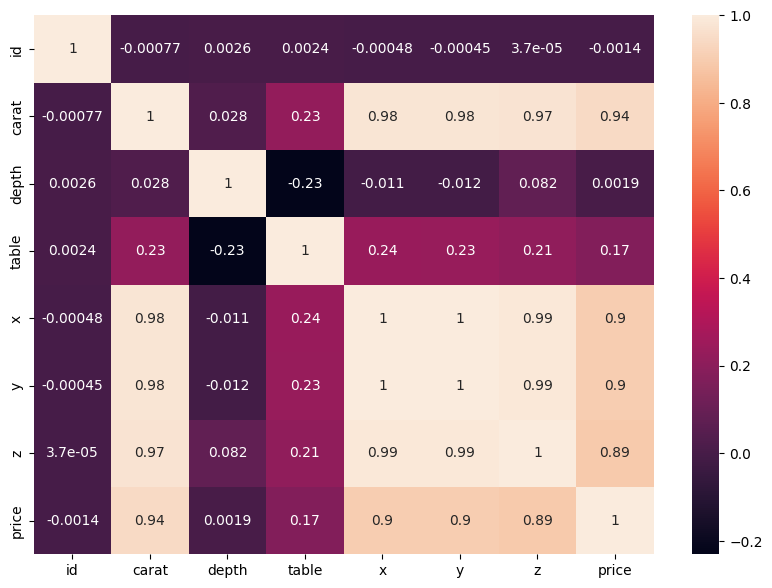

In [147]:
plt.figure(figsize=(10,7))
sns.heatmap(wines[num_col].corr(),annot=True)

In [148]:
# cut_map={'Fair':1,'Good':2,'Very Good':3,'Premium':4,'Ideal':5}
# clarity_map={'I1':1,'SI1':2,'SI2':3,'VS2':4,'VS1':5,'VVS2':6,'VVS1':7,'IF':8}
# color_map={'D':1,'E':2,'F':3,'G':4,'H':5,'I':6,'J':7}

In [149]:
# data['cut']=data['cut'].map(cut_map)
# data['clarity']=data['clarity'].map(clarity_map)
# data['color']=data['color'].map(color_map)

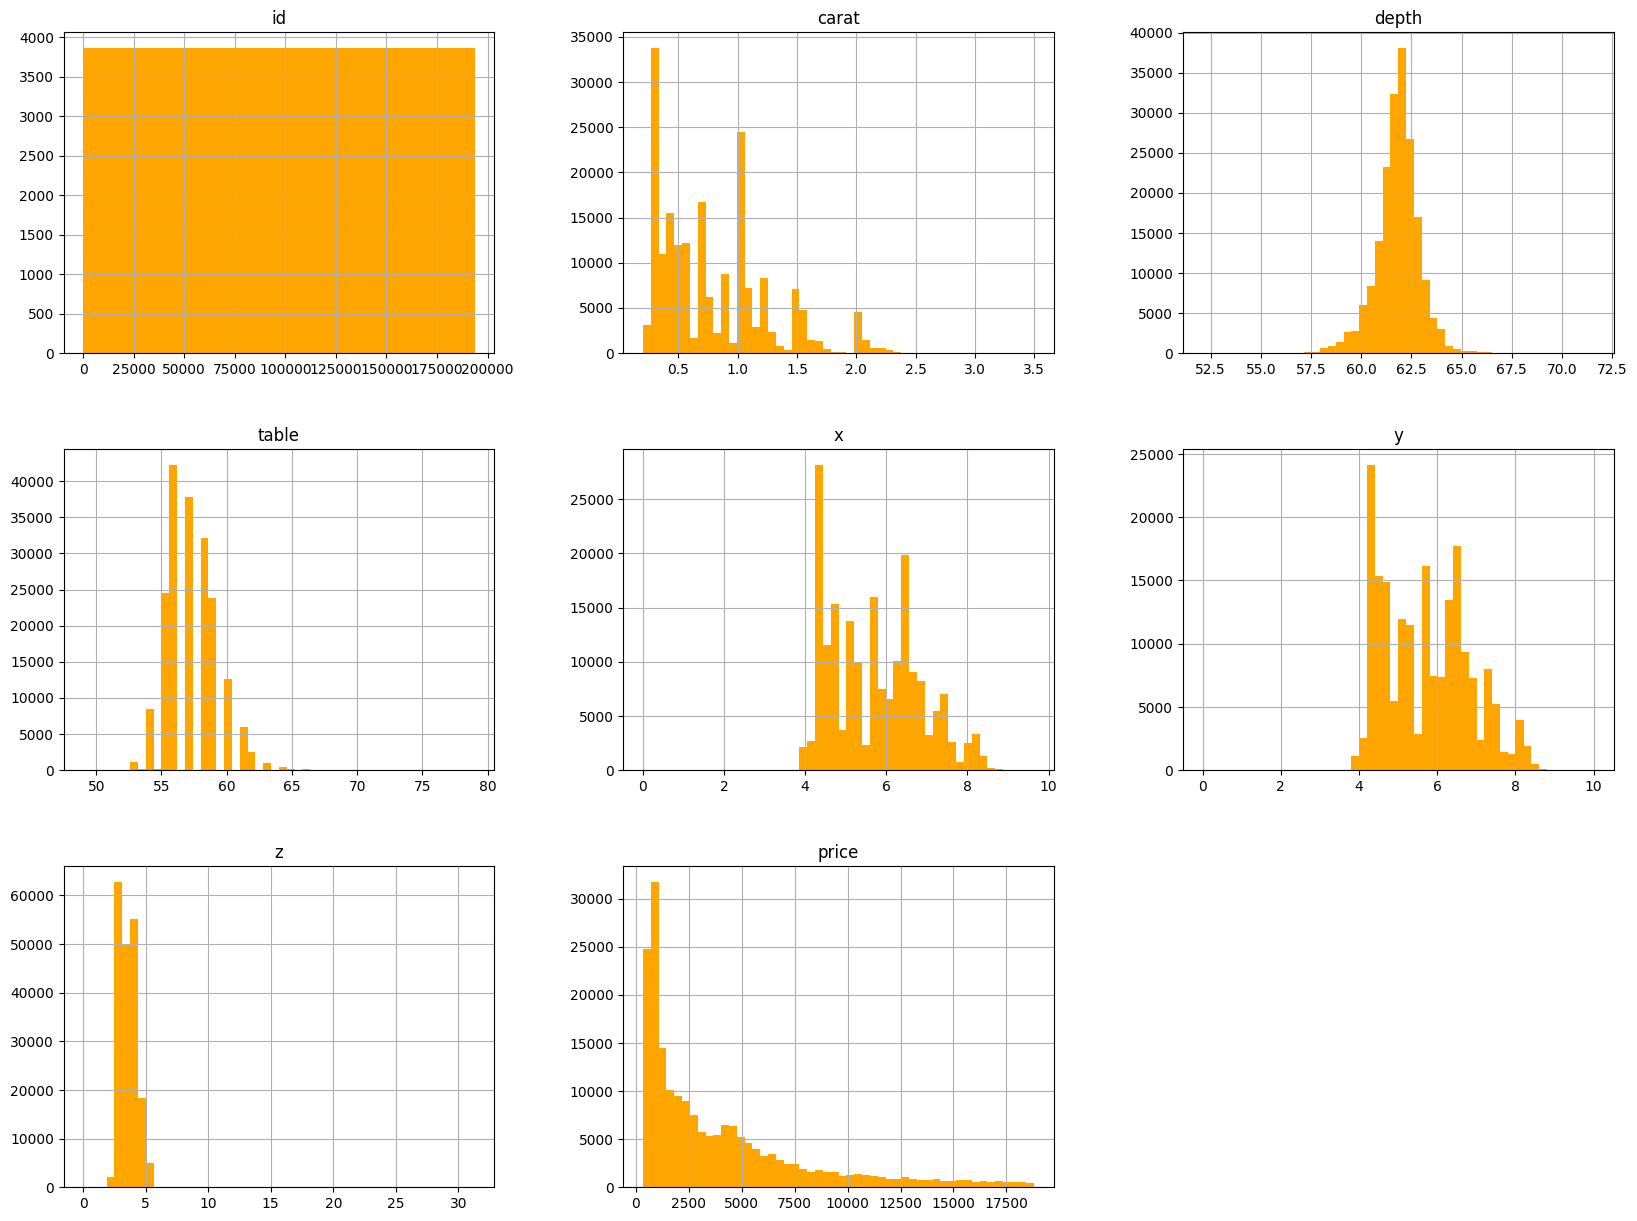

In [150]:
wines.hist(bins=50,figsize=(20,15),color='orange')
plt.show()

In [227]:
X=wines.iloc[:,:-1]
y=wines.iloc[:,-1]


In [228]:
from sklearn.model_selection import train_test_split

In [229]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=32)

In [230]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(154858, 10)
(38715, 10)
(154858,)
(38715,)


In [231]:
from sklearn.linear_model import ElasticNet,Lasso,Ridge,LinearRegression

In [232]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
import numpy as np


def eval_metrics(actual,pred):
    rmse=np.sqrt(mean_squared_error(actual,pred))
    mse=mean_squared_error(actual,pred)
    mae=mean_absolute_error(actual,pred)
    r2=r2_score(actual,pred)
    

    return rmse,mse,mae,r2

In [233]:
elasticnet= ElasticNet(alpha=1.0,l1_ratio=0.5,random_state=32)
elasticnet.fit(X_train,y_train)
elasticnet_y_pred=elasticnet.predict(X_test)

rmse,mse,mae,r2=eval_metrics(y_test,elasticnet_y_pred)
print('rmse',rmse)
print('mse',mse)
print('mae',mae)
print('r2',r2)

ValueError: could not convert string to float: 'Premium'

In [ ]:
lasso=Lasso(alpha=0.01)
lasso.fit(X_train,y_train)
lasso_y_pred=lasso.predict(X_test)

rmse,mse,mae,r2=eval_metrics(y_test,lasso_y_pred)

print('rmse',rmse)
print('mse',mse)
print('mae',mae)
print('r2',r2)


rmse 0.7393422667068799
mse 0.5466269873392671
mae 0.5677505410550011
r2 0.29217378084697054


In [ ]:
ridge=Ridge(alpha=0.1)
ridge.fit(X_train,y_train)
ridge_y_pred=ridge.predict(X_test)


rmse,mse,mae,r2=eval_metrics(y_test,ridge_y_pred)
print('rmse',rmse)
print('mse',mse)
print('mae',mae)
print('r2',r2)

rmse 0.7191225921517946
mse 0.5171373025431164
mae 0.5574237431713124
r2 0.3303599161398455


In [ ]:
lr=LinearRegression()
lr.fit(X_train,y_train)
lr_y_pred=lr.predict(X_test)

rmse,mse,mae,r2=eval_metrics(y_test,lr_y_pred)
print('rmse',rmse)
print('mse',mse)
print('mae',mae)
print('r2',r2)

rmse 0.7189277787828305
mse 0.5168571511056146
mae 0.5569371897541321
r2 0.33072268368954594


Ridge(alpha=0.1)

# preprocessing


In [3]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer


In [4]:
X=wines.drop(columns=['price','id'])
y=wines['price']


In [5]:
# cat_cols1=X.columns[X.dtypes=='object']
# num_cols1=X.columns[X.dtypes!='object']


cat_cols1=X.select_dtypes(include='object').columns
num_cols1=X.select_dtypes(exclude='object').columns
cat_cols1

Index(['cut', 'color', 'clarity'], dtype='object')

In [6]:
X['clarity'].value_counts()

clarity
SI1     53272
VS2     48027
VS1     30669
SI2     30484
VVS2    15762
VVS1    10628
IF       4219
I1        512
Name: count, dtype: int64

In [7]:
cut_categories=['Fair','Good','Very Good','Premium','Ideal']
color_categories=['D','E','F','G','H','I','J']
clarity_categories=['I1','SI2','SI1','VS2','VS1','VVS2','VVS1','IF']

In [8]:
num_pipeline=Pipeline(
    steps=[
        ('imputer',SimpleImputer()),
        ('scaler',StandardScaler()),
    ]
)



cat_pipeline=Pipeline(
    steps=[
        ('imputer',SimpleImputer(strategy='most_frequent')),
        ('ordinalencoder',OrdinalEncoder(categories=[cut_categories,color_categories,clarity_categories]))
    ]
)

In [9]:
preprocessor=ColumnTransformer(
    [
       ('num_pipeline',num_pipeline,num_cols1),
       ('cat_pipeline',cat_pipeline,cat_cols1)
    ]
)

# first split data then preproces

In [10]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=32)

In [11]:
preprocessor.fit_transform(X_train)

array([[-0.88880656, -0.85119789,  1.44156623, ...,  3.        ,
         5.        ,  4.        ],
       [ 0.47346999,  1.18120245, -1.16358916, ...,  1.        ,
         1.        ,  3.        ],
       [-0.60770187, -0.57405239, -0.64255808, ...,  4.        ,
         3.        ,  5.        ],
       ...,
       [-0.88880656, -0.57405239, -0.64255808, ...,  2.        ,
         3.        ,  3.        ],
       [ 0.47346999,  1.36596612,  1.44156623, ...,  3.        ,
         1.        ,  2.        ],
       [ 0.60321061, -0.20452505, -0.12152701, ...,  4.        ,
         4.        ,  1.        ]])

In [12]:
preprocessor.transform(X_test)

array([[-1.08341749, -0.38928872,  0.92053515, ...,  2.        ,
         0.        ,  4.        ],
       [-0.19685656, -1.86739806,  1.44156623, ...,  2.        ,
         5.        ,  1.        ],
       [-1.04017062, -0.85119789, -0.12152701, ...,  4.        ,
         0.        ,  4.        ],
       ...,
       [ 1.55464185, -0.57405239,  3.00465946, ...,  2.        ,
         5.        ,  3.        ],
       [ 0.60321061, -1.49787073,  0.39950407, ...,  3.        ,
         1.        ,  2.        ],
       [-0.60770187,  0.16500228, -0.64255808, ...,  4.        ,
         1.        ,  3.        ]])

In [13]:
preprocessor.get_feature_names_out()

array(['num_pipeline__carat', 'num_pipeline__depth',
       'num_pipeline__table', 'num_pipeline__x', 'num_pipeline__y',
       'num_pipeline__z', 'cat_pipeline__cut', 'cat_pipeline__color',
       'cat_pipeline__clarity'], dtype=object)

In [14]:
X_train=pd.DataFrame(preprocessor.fit_transform(X_train),columns=preprocessor.get_feature_names_out())
X_test=pd.DataFrame(preprocessor.fit_transform(X_test),columns=preprocessor.get_feature_names_out())

In [15]:
X_train

,num_pipeline__carat,num_pipeline__depth,num_pipeline__table,num_pipeline__x,num_pipeline__y,num_pipeline__z,cat_pipeline__cut,cat_pipeline__color,cat_pipeline__clarity
0,-0.888807,-0.851198,1.441566,-0.944040,-0.927206,-0.993419,3.0,5.0,4.0
1,0.473470,1.181202,-1.163589,0.589495,0.616053,0.703190,1.0,1.0,3.0
2,-0.607702,-0.574052,-0.642558,-0.502021,-0.491462,-0.529389,4.0,3.0,5.0
3,2.852048,0.072620,-1.163589,2.321487,2.277325,2.283791,4.0,6.0,3.0
4,0.041001,-1.497871,1.441566,0.318871,0.271089,0.166655,3.0,2.0,4.0
...,...,...,...,...,...,...,...,...,...
135496,2.635814,-1.682634,0.399504,2.177155,2.150233,1.950270,3.0,6.0,1.0
135497,-0.845560,0.719293,-0.121527,-0.962081,-0.927206,-0.877412,4.0,3.0,3.0
135498,-0.888807,-0.574052,-0.642558,-0.907957,-0.927206,-0.949916,2.0,3.0,3.0
135499,0.473470,1.365966,1.441566,0.589495,0.543429,0.703190,3.0,1.0,2.0


# model trainig

In [16]:
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [17]:
!pip install xgboost


[notice] A new release of pip is available: 24.1 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [23]:
models={
    'LinearRegression':LinearRegression(),
    'Lasso':Lasso(),
    'Ridge':Ridge(),
    'ElasticNet':ElasticNet(),
    'RandomForest':RandomForestRegressor(),
    'xgboost': XGBRegressor()
}

In [24]:
trained_model_list=[]
model_list=[]
r2_list=[]

In [25]:
list(models)   #here model name extract

['LinearRegression', 'Lasso', 'Ridge', 'ElasticNet', 'RandomForest', 'xgboost']

In [26]:
def evaluate_model(y_test,y_pred):
    mae=mean_absolute_error(y_test,y_pred)
    mse=mean_squared_error(y_test,y_pred)
    r2=r2_score(y_test,y_pred)
    
    return mae,mse,r2

In [27]:
for i in range(len(list(models))):
    #here real model extract
    model=list(models.values())[i]
    # print(model)

    #model trainig
    model.fit(X_train,y_train)

    # model prediction
    y_pred=model.predict(X_test)

    # this is for the validation
    MAE,MSE,R2=evaluate_model(y_test,y_pred)


    print('Model training performance',model)
    print('MSE:',MSE)
    print('MAE:',MAE)
    print('R2:',R2)


    r2_list.append(R2)

    print('='*40)
    print('\n')


Model training performance LinearRegression()
MSE: 1021543.8579079645
MAE: 677.8911046257203
R2: 0.9371656413610999


Model training performance Lasso()
MSE: 1022035.767309314
MAE: 679.2531986628027
R2: 0.9371353844010066


Model training performance Ridge()
MSE: 1021533.7433699694
MAE: 677.9206585988107
R2: 0.9371662634983708


Model training performance ElasticNet()
MSE: 2272477.5105276457
MAE: 1051.7652132833725
R2: 0.8602216970030536


Model training performance RandomForestRegressor()
MSE: 371478.944521013
MAE: 313.5564913036937
R2: 0.9771506225149891


Model training performance XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bi

In [28]:
max(r2_list)

0.9791240162767056

In [1]:
import sys


class CustomException(Exception):
    
    def __init__(self,error_message,error_details:sys):
        
        self.error_message = error_message
        _,_,exc_tb = error_details.exc_info()

    def __str__(self):
        pass



if __name__ =='__main__':
    try:
        a=1/0
    except Exception as e: 
        raise CustomException(e,sys)

TypeError: __str__ returned non-string (type NoneType)